### Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load the Data

In [2]:
data= pd.read_csv("surveydata.csv")

In [3]:
#create the copy of the data file
survey= data.copy()
survey.head()

,Timestamp,Mention your Gender.,Are you planning to go for higher studies?,"If yes, are/will you considering/consider applying to foreign universities for your Master's degree?",What is your current field of study?,"If higher studies, then in which field?",What is/will be your preferred choice of country/continent for your respective field?,"On a scale of 1 to 10, how much will you rate your preferred choice of country on the basis of total expense?","On a scale of 1-10, how much will you rate the on field reality of your preferred country? (Considering factors such as Racism, safety, loneliness, etc.)",Do you feel that you have access to appropriate guidance towards going abroad for higher studies?,Is your choice of country affected by the immigration policies of that respective country?,Does your family favors going abroad for higher studies?,Mention your family income.,What are the Financial options would you be looking at for applying abroad?,Will you have to take a loan in order to study abroad for your higher studies?
0,2021/05/19 7:46:36 PM GMT+5:30,Male,No,No,Law/Journalism,Law/Journalism,Europe,10.0,7.0,No,No,No,0-3 LPA,I don't want to go till 2024,No
1,2021/05/19 7:49:50 PM GMT+5:30,Female,Yes,No,Mathematics/ Statistics,Mathematics/ Statistics,Asia,4.0,3.0,No,NaN,No,3-6 LPA,NaN,NaN
2,2021/05/19 7:49:53 PM GMT+5:30,Female,Yes,Yes,Mathematics/ Statistics,Mathematics/ Statistics,U.S.A.,9.0,7.0,Maybe,Yes,Yes,>12 LPA,Scholarships,Yes
3,2021/05/19 7:50:12 PM GMT+5:30,Male,No,No,Mathematics/ Statistics,Mathematics/ Statistics,U.S.A.,10.0,4.0,Maybe,Yes,Yes,0-3 LPA,Scholarships;Part-time work,Yes
4,2021/05/19 7:50:52 PM GMT+5:30,Female,Yes,No,Mathematics/ Statistics,Mathematics/ Statistics,Asia,3.0,4.0,No,Yes,No,3-6 LPA,NaN,Yes


### Data Pre-processing

In [4]:
#Drop the "Timestamp" column 
survey=survey.drop('Timestamp', axis=1)

In [5]:
#Display all the column names
survey.columns.values

array(['Mention your Gender.',
       'Are you planning to go for higher studies?',
       "If yes, are/will you considering/consider applying to foreign universities for your Master's degree?",
       'What is your current field of study?',
       'If higher studies, then in which field?',
       'What is/will be your preferred choice of country/continent for your respective field?',
       ' On a scale of 1 to 10, how much will you rate your preferred choice of country on the basis of total expense?',
       'On a scale of 1-10, how much will you rate the on field reality of your preferred country? (Considering factors such as Racism, safety, loneliness, etc.)',
       'Do you feel that you have access to appropriate guidance towards going abroad for higher studies?',
       'Is your choice of country affected by the immigration policies of that respective country?',
       'Does your family favors going abroad for higher studies?',
       'Mention your family income.',
       'What 

In [6]:
#Give relevant names to columns
survey.rename(columns = {'Mention your Gender.' : 'Gender',  'Are you planning to go for higher studies?' : "Higher Studies",  "If yes, are/will you considering/consider applying to foreign universities for your Master's degree?": "Higher Studies Abroad", 'What is your current field of study?': "CurrentField",'If higher studies, then in which field?':"HigherStudiesField", 'What is/will be your preferred choice of country/continent for your respective field?': "Country",' On a scale of 1 to 10, how much will you rate your preferred choice of country on the basis of total expense?':"ExpenseRating",'On a scale of 1-10, how much will you rate the on field reality of your preferred country? (Considering factors such as Racism, safety, loneliness, etc.)':"FieldRating", 'Do you feel that you have access to appropriate guidance towards going abroad for higher studies?':"Guidance",'Is your choice of country affected by the immigration policies of that respective country?':"ImmigrationPolicies",'Does your family favors going abroad for higher studies?':"FamilyFavour", 'Mention your family income.':"FamilyIncome", 'What are the Financial options would you be looking at for applying abroad?':"FinancialOptions",    'Will you have to take a loan in order to study abroad for your higher studies?':"Loan"}, inplace = True)

In [7]:
#Display the new column names
survey.columns.values

array(['Gender', 'Higher Studies', 'Higher Studies Abroad',
       'CurrentField', 'HigherStudiesField', 'Country', 'ExpenseRating',
       'FieldRating', 'Guidance', 'ImmigrationPolicies', 'FamilyFavour',
       'FamilyIncome', 'FinancialOptions', 'Loan'], dtype=object)

In [8]:
#Calculate the number of misssing values in each column
survey.isna().sum()

Gender                    0
Higher Studies            0
Higher Studies Abroad     7
CurrentField              0
HigherStudiesField        5
Country                   6
ExpenseRating             7
FieldRating               8
Guidance                  6
ImmigrationPolicies      11
FamilyFavour              6
FamilyIncome              8
FinancialOptions         11
Loan                      9
dtype: int64

In [9]:
# Remove the records that contain missing values in  "FamilyIncome" and "Country" columns
survey=survey.dropna(subset=['FamilyIncome','Country'])

In [10]:
#Display the data types of each column in the datset.
survey.dtypes

Gender                    object
Higher Studies            object
Higher Studies Abroad     object
CurrentField              object
HigherStudiesField        object
Country                   object
ExpenseRating            float64
FieldRating              float64
Guidance                  object
ImmigrationPolicies       object
FamilyFavour              object
FamilyIncome              object
FinancialOptions          object
Loan                      object
dtype: object

In [11]:
#Put all values of 'FamilyIncome' in two intervals i.e. <6 LPA and >6 LPA
survey['FamilyIncome']=np.where(np.isin(survey['FamilyIncome'], ('0-3 LPA','3-6 LPA')),"<6 LPA",">6 LPA")
survey['FamilyIncome'].unique() #Display the unique values in "FamilyIncome" column

array(['<6 LPA', '>6 LPA'], dtype=object)

In [12]:
survey["Higher Studies Abroad"]=survey["Higher Studies Abroad"].fillna("No") #Replace missing values with 'No' in the given column.
survey["ExpenseRating"]=survey["ExpenseRating"].fillna(np.mean(survey['ExpenseRating'])) #Replace missing values with mean value in the given column.
survey["FieldRating"]=survey["FieldRating"].fillna(np.mean(survey['FieldRating'])) #Replace missing values with mean value in the given column
survey["FamilyFavour"]=survey["FamilyFavour"].fillna("No") #Replace missing values with 'No' in the given column.
survey["Loan"]=survey["Loan"].fillna("No") #Replace missing values with 'No' in the given column.

In [13]:
# Here it has been assumed that the one who has not mentioned the higher studies field would pursue the highr studies in the
#field he/she is currently pursuing.
#Therefore, replace all the missing values in the "HigherStudiesField" column with the corresponding value in "CurrentField" column.
survey["HigherStudiesField"]= np.where(survey["HigherStudiesField"].isnull(),survey["CurrentField"],survey["HigherStudiesField"])

In [14]:
#Calculate the number of misssing values in each column
survey.isna().sum()

Gender                   0
Higher Studies           0
Higher Studies Abroad    0
CurrentField             0
HigherStudiesField       0
Country                  0
ExpenseRating            0
FieldRating              0
Guidance                 1
ImmigrationPolicies      3
FamilyFavour             0
FamilyIncome             0
FinancialOptions         3
Loan                     0
dtype: int64

In [15]:
#Re-indexing the datsaset
survey=survey.reset_index(drop=True)

In [16]:
survey

,Gender,Higher Studies,Higher Studies Abroad,CurrentField,HigherStudiesField,Country,ExpenseRating,FieldRating,Guidance,ImmigrationPolicies,FamilyFavour,FamilyIncome,FinancialOptions,Loan
0,Male,No,No,Law/Journalism,Law/Journalism,Europe,10.0,7.0,No,No,No,<6 LPA,I don't want to go till 2024,No
1,Female,Yes,No,Mathematics/ Statistics,Mathematics/ Statistics,Asia,4.0,3.0,No,NaN,No,<6 LPA,NaN,No
2,Female,Yes,Yes,Mathematics/ Statistics,Mathematics/ Statistics,U.S.A.,9.0,7.0,Maybe,Yes,Yes,>6 LPA,Scholarships,Yes
3,Male,No,No,Mathematics/ Statistics,Mathematics/ Statistics,U.S.A.,10.0,4.0,Maybe,Yes,Yes,<6 LPA,Scholarships;Part-time work,Yes
4,Female,Yes,No,Mathematics/ Statistics,Mathematics/ Statistics,Asia,3.0,4.0,No,Yes,No,<6 LPA,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Male,Yes,Yes,Medical,Medical,Australia,9.0,9.0,Yes,Yes,Yes,<6 LPA,Scholarships,Yes
90,Male,Yes,Yes,"Engineering/ Architectural, etc.","Engineering/ Architectural, etc.",U.S.A.,4.0,2.0,No,No,Yes,<6 LPA,Scholarships;Part-time work,No
91,Male,Yes,Yes,"Engineering/ Architectural, etc.","Engineering/ Architectural, etc.",Australia,9.0,6.0,Yes,Yes,No,>6 LPA,Loan/Grants;Scholarships,Yes
92,Female,Yes,Yes,Mathematics/ Statistics,Computer Science/ICT,U.S.A.,10.0,9.0,No,Yes,Yes,>6 LPA,Scholarships;Family bank,No


### Exploratory Data Analysis

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:58: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


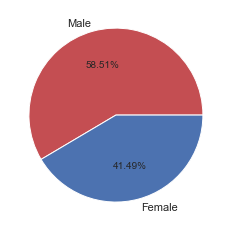

In [17]:
#Pie chart showing the Gender distribution of the respondents
plt.pie(((np.argwhere(survey['Gender']=='Male').shape[0]),(np.argwhere(survey['Gender']=='Female').shape[0])), labels=['Male','Female'],autopct="%.2f%%", colors=['r','b'])
plt.show()

Our Survey population consists of 58.51% Females and 41.49% Males.

##### Gender Impact

In [18]:
#Create an array showing the percentage of male going and not going for higher studies. 
Male=[(np.argwhere((survey['Gender']=='Male') & (survey['Higher Studies']=='Yes')).shape[0])*100/94,(np.argwhere((survey['Gender']=='Male') & (survey['Higher Studies']=='No')).shape[0])*100/94]
Male

[44.680851063829785, 13.829787234042554]

In [19]:
#Create an array showing the percentage of male going nad not going for higher studies. 
Female=[(np.argwhere((survey['Gender']=='Female') & (survey['Higher Studies']=='Yes')).shape[0])*100/94,(np.argwhere((survey['Gender']=='Female') & (survey['Higher Studies']=='No')).shape[0])*100/94]
Female

[38.297872340425535, 3.1914893617021276]

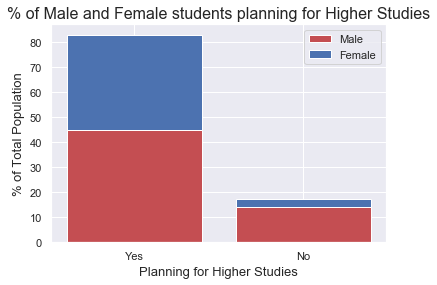

In [20]:
#Bar chart showing the percentage of male and female going and not going for higher studies with necessary labelling.
plt.bar(['Yes','No'], Male , color='r')
plt.bar(['Yes','No'], Female, bottom=Male, color='b') #Stack the female bar chart above the male bar chart. 
plt.legend(labels=['Male','Female'])
plt.xlabel('Planning for Higher Studies',fontsize=13)
plt.ylabel('% of Total Population',fontsize=13)
plt.title('% of Male and Female students planning for Higher Studies', fontsize=16)
plt.show()

The graph shows that more than 80% of students consider going for Higher Studies after their Bachelor's. We also see no gender effect in whether a person would go for higher studies or not.

In [21]:
survey['Higher Studies'].value_counts()

Yes    78
No     16
Name: Higher Studies, dtype: int64

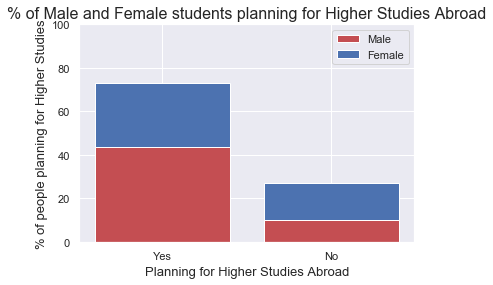

In [22]:
#Bar chart showing the percentage of male and female going and not going abroad for higher studies with necessary labelling.
Male_Abroad=[(np.argwhere((survey['Higher Studies']=='Yes') & (survey['Higher Studies Abroad']=='Yes') & (survey['Gender']=='Male')).shape[0])*100/survey['Higher Studies'].value_counts()[0],(np.argwhere((survey['Higher Studies']=='Yes') & (survey['Higher Studies Abroad']=='No') & (survey['Gender']=='Male')).shape[0])*100/survey['Higher Studies'].value_counts()[0]]
Female_Abroad=[(np.argwhere((survey['Higher Studies']=='Yes') & (survey['Higher Studies Abroad']=='Yes') & (survey['Gender']=='Female')).shape[0])*100/survey['Higher Studies'].value_counts()[0],(np.argwhere((survey['Higher Studies']=='Yes') & (survey['Higher Studies Abroad']=='No') & (survey['Gender']=='Female')).shape[0])*100/survey['Higher Studies'].value_counts()[0]]
plt.bar(['Yes','No'], Male_Abroad , color='r')
plt.bar(['Yes','No'], Female_Abroad, bottom=Male_Abroad, color='b') #Stack the female bar chart above the male bar chart.
plt.legend(labels=['Male','Female'])
plt.ylim(0,100)
plt.xlabel('Planning for Higher Studies Abroad',fontsize=13)
plt.ylabel('% of people planning for Higher Studies',fontsize=13)
plt.title('% of Male and Female students planning for Higher Studies Abroad', fontsize=16)
plt.show()

We observe that out of all the poeple planning for Higher Studies, more than 70% of them consider applyting abroad.Also, the graph shows more females not applying abroad as comapred to men, which shows that a student given that she is female is more likely to not apply abroad for higher studies when compared to male students.

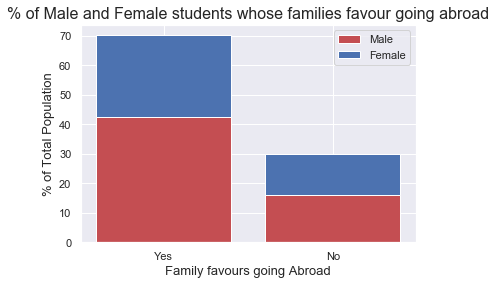

In [23]:
#Bar chart showing the percentage of male and female getting support for applying abroad for higher studies with necessary labelling.
Male_FamilyFavour=[(np.argwhere((survey['Gender']=='Male') & (survey['FamilyFavour']=='Yes')).shape[0])*100/94,(np.argwhere((survey['Gender']=='Male') & (survey['FamilyFavour']=='No')).shape[0])*100/94]
Female_FamilyFavour=[(np.argwhere((survey['Gender']=='Female') & (survey['FamilyFavour']=='Yes')).shape[0])*100/94,(np.argwhere((survey['Gender']=='Female') & (survey['FamilyFavour']=='No')).shape[0])*100/94]
plt.bar(['Yes','No'], Male_FamilyFavour , color='r')
plt.bar(['Yes','No'], Female_FamilyFavour, bottom=Male_FamilyFavour, color='b')#Stack the female bar char above the male bar chart.
plt.legend(labels=['Male','Female'])
plt.xlabel('Family favours going Abroad',fontsize=13)
plt.ylabel('% of Total Population',fontsize=13)
plt.title('% of Male and Female students whose families favour going abroad', fontsize=16)
plt.show()

The graph shows majority of the families favour their child to apply abroad for higher studies irrespective of whether the child is male or female.

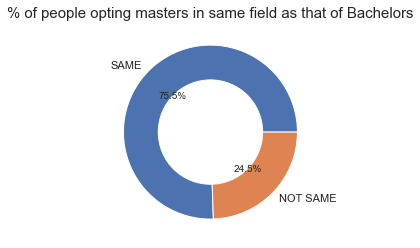

In [24]:
#Create a for loop to create two arrays showing % of people opting masters in same field as that of Bachelor's
same=[]
not_same=[]
for i in range(0,survey.shape[0]):
    if survey.iloc[i,3]==survey.iloc[i,4]:
        same.append(1)
    else:
        not_same.append(1)
same=(sum(same)/(survey.shape[0])*100)
not_same=(sum(not_same)/(survey.shape[0])*100)

#Doughnut chart showing % of people opting masters in same field as that of Bachelor's
distribution=[same,not_same]
labels=["SAME","NOT SAME"]
#First create a pie plot.
plt.pie(distribution,labels=labels,autopct="%1.1f%%")
#Add a circle at the to transform it in a doughnut chart.  
centre_circle=plt.Circle((0,0),0.60,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('% of people opting masters in same field as that of Bachelors',fontsize=15)
plt.show()

The charts shows that 24.5% of the students tend to pursue Master's in a field that is different from that of their Bachelor's.

The graph shows that U.S.A. and European countries are among the most preferred countries among students applying for their Higher Studies and Cananda being the least.

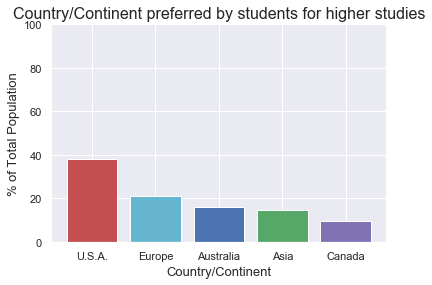

In [27]:
#Bar chart showing distribution of preference of countries among Indian students for higher studies. 
plt.bar(survey['Country'].value_counts().index, height= survey['Country'].value_counts().values*100/sum(survey['Country'].value_counts().values), color=['r','c','b','g','m'])
plt.ylim(0,100)#Set the y axis limits.
plt.xlabel('Country/Continent',fontsize=13)
plt.ylabel('% of Total Population',fontsize=13)
plt.title('Country/Continent preferred by students for higher studies', fontsize=16)
plt.show()

In [28]:
#Replace 'Biotechnology' and 'Cybersecurity' with 'Engineering/ Architectural, etc.' and 'Computer Science/ICT' respectively.
survey['HigherStudiesField']=np.where(np.isin(survey['HigherStudiesField'],['biotechnology ',"Biotechnology"]), 'Engineering/ Architectural, etc.',survey['HigherStudiesField'])
survey['HigherStudiesField']=np.where(survey['HigherStudiesField']== 'Cybersecurity', 'Computer Science/ICT',survey['HigherStudiesField'])
survey['HigherStudiesField'].value_counts()

Engineering/ Architectural, etc.                        22
Mathematics/ Statistics                                 16
Medical                                                 14
Computer Science/ICT                                    11
Business and Management                                 11
Commerce (Finance, Accounting, others)                   9
Science (Physics, Chemistry, others)                     5
Arts (History, Political Science, Economics, Others)     3
Law/Journalism                                           2
None                                                     1
Name: HigherStudiesField, dtype: int64

In [29]:
#Create a list showing preference for each country according to different fields.
country=[]
for i in survey['Country'].value_counts().index:
    name=[]
    for j in survey['HigherStudiesField'].value_counts().index:
        name.append((np.argwhere((survey['Country']==i) & (survey['HigherStudiesField']== j)).shape[0]))
    country.append(name)
                 

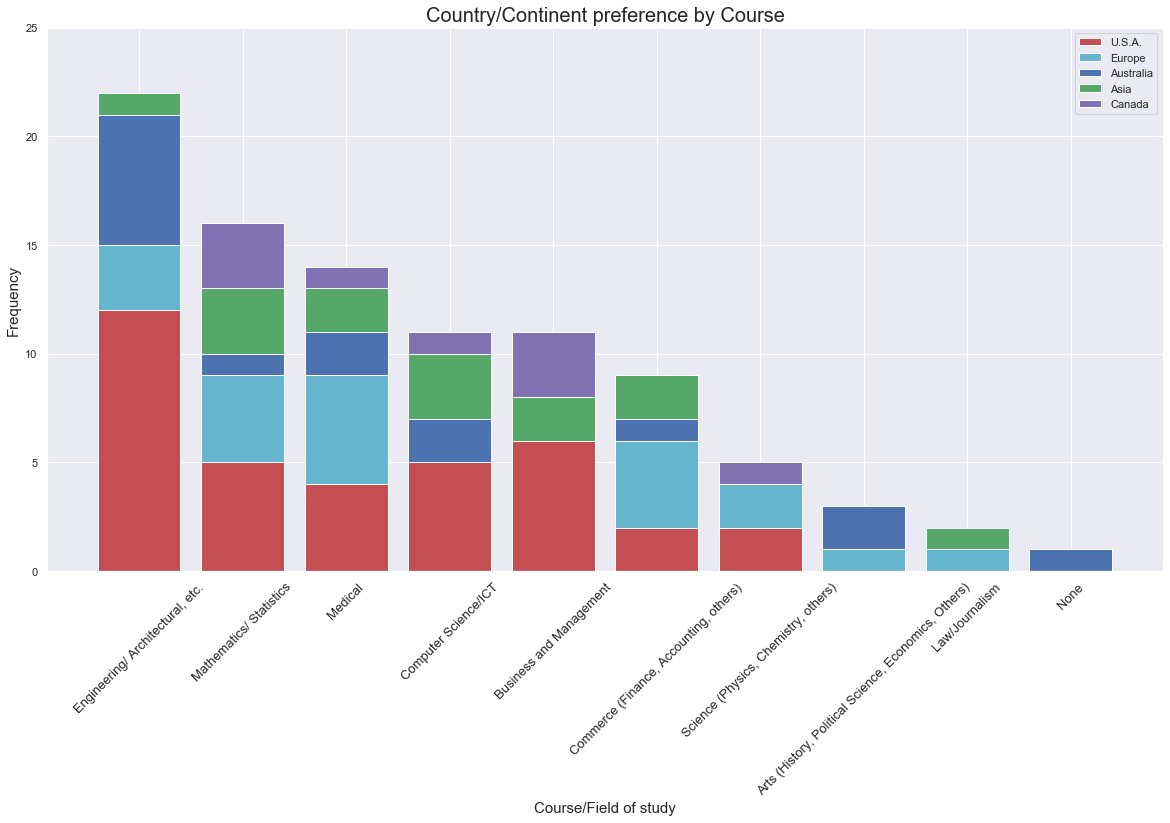

In [30]:
#Bar chart showing preference for each country according to different fields.
color_list = ['r','c','b','g','m']
plt.figure(figsize=(20,10))
#Create a for loop to stack the countries bar charts above each other.
for i in range(len(country)):
    plt.bar(survey['HigherStudiesField'].value_counts().index, country[i],
    bottom = np.sum(country[:i], axis = 0),
    color = color_list[i % len(color_list)])
plt.xlabel("Course/Field of study",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.ylim(0,25) #Set y axis limits
plt.title("Country/Continent preference by Course", fontsize=20)
plt.legend(labels=survey['Country'].value_counts().index)
plt.xticks(rotation=45,fontsize=13)#Rotate x ticks to 45 degrees.
plt.show()

The graph shows that more than 50% of the students applying Abroad for masters in either Engineering/Architecture or Business/management considers U.S.A. as their preferred country. However most of the students applying for a Master's in Medical or Commerce field considers European countries as their preferred choice.

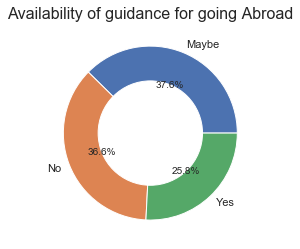

In [31]:
#Doughnut chart showing % of people getting proper guidance for applying in foreign universities.
plt.pie(survey['Guidance'].value_counts().values,labels=survey['Guidance'].value_counts().index,autopct="%1.1f%%")
centre_circle=plt.Circle((0,0),0.60,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Availability of guidance for going Abroad", fontsize=16)
plt.show()

The chart shows that 36.6% students feel that they do not have access to proper guidance for applying Abroad.

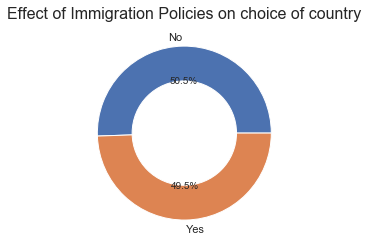

In [32]:
#Doughnut chart showing % of people affected by immigration policies for applying in their respective country of  preference
plt.pie(survey['ImmigrationPolicies'].value_counts().values,labels=survey['ImmigrationPolicies'].value_counts().index,autopct="%1.1f%%")
centre_circle=plt.Circle((0,0),0.60,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Effect of Immigration Policies on choice of country", fontsize=16)
plt.show()

The charts shows that immigration policies of a country affect the decision of around 50% of the students about their country preference for a Mater's degree.

### Hypothesis Testing

#### Test for difference of means between expense rating for U.S.A. and Europe.

In [33]:
#Retrieve arrays of two independent samples i.e. sample of expense ratings of U.S.A. and that of Europe from the dataset. 
usa=np.where(survey["Country"]=="U.S.A.",survey["ExpenseRating"],np.nan)
europe=np.where(survey["Country"]=="Europe",survey["ExpenseRating"],np.nan)
usa_expense=usa[np.isnan(usa)==False]
europe_expense=europe[np.isnan(europe)==False]


Since the population variance is unknown t-Test has been applied.<br>
Level of significance(alpha) =0.05<p>
Null Hypotheses(H_0): Sample mean expense ratings for U.S.A. is equal to  Sample mean expense ratings of Europe i.e. $$\mu_{usa} = \mu_{eur}$$ 
Alternative Hypotheses(H_1):Sample mean expense ratings for U.S.A. is greater than Sample mean expense ratings of Europe i.e. $$\mu_{usa} > \mu_{eur}$$ 

In [34]:
#Import stats module from scipy
from scipy import stats

To check whether the two population variances are equal or not F-Test needs to be applied.<br>
Level of significance(alpha) =0.05

H0: The population variances are equal i.e. $$ \sigma_{usa}^{2} = \sigma_{eur}^{2} $$

H1: The population variances are not equal i.e. $$\sigma_{usa}^{2} != \sigma_{eur}^{2} $$

In [35]:
#define F-test function
def f_test(sample1, sample2):# Take two samples as argument of the function.
    x = sample1
    y = sample2
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

In [36]:
#Call the function that would return the F statistic and the p value.
f_test(usa_expense,europe_expense)

(1.3304591921459827, 0.2575402209610602)

Since p value is 0.2575402209610602 which is more than alpha(0.05), therefore H0 may be accepted.<br>
There is not enough statistical evidence to conclude that the two population variances are unequal.<br>
Now, we can proceed towards t Test.

In [37]:
#Apply the t Test for independent samples using stats module.
stats.ttest_ind(usa_expense,europe_expense,equal_var=True,alternative='greater')

Ttest_indResult(statistic=-0.2638054366581414, pvalue=0.6035330074477102)

Since p value is 0.6035330074477102 which is greater than alpha(0.05), therefore H0 may be accepted.<br>
There is not enough statistical evidence to conclude that mean expense ratings for U.S.A. is greater than mean expense ratings of Europe

#### Test for difference of means of field rating for U.S.A. and Europe.

In [38]:
#Retrieve arrays of two independent samples i.e. sample of field ratings of U.S.A. and that of Europe from the dataset. 
usa_1=np.where(survey["Country"]=="U.S.A.",survey["FieldRating"],np.nan)
europe_1=np.where(survey["Country"]=="Europe",survey["FieldRating"],np.nan)
usa_field=usa_1[np.isnan(usa_1)==False]
europe_field=europe_1[np.isnan(europe_1)==False]

Level of significance(alpha) =0.05<p>
Null Hypotheses(H_0): Sample mean expense ratings for U.S.A. is equal to Sample mean expense ratings of Europe i.e. $$\mu_{usa} = \mu_{eur}$$ 
Alternative Hypotheses(H_1):Sample mean expense ratings for U.S.A. is greater than Sample mean expense ratings of Europe i.e. $$\mu_{usa} > \mu_{eur}$$ 



To check whether the two population variances are equal or not F-Test needs to be applied.<br>
Level of significance(alpha) =0.05

H0: The population variances are equal i.e. $$ \sigma_{usa}^{2} = \sigma_{eur}^{2} $$

H1: The population variances are not equal i.e. $$\sigma_{usa}^{2} != \sigma_{eur}^{2} $$


In [39]:
#Call the function that would return the F statistic and the p value.
f_test(usa_field,europe_field)

(1.067317356795313, 0.4524158391140549)

Since p value is 0.4524158391140549 which is greater than alpha(0.05), therefore H0 may be accepted.<br>
There is not enough statistical evidence to conclude that the two population variances are unequal.<br>
Now, we can proceed towards t Test.

In [40]:
#Apply the t Test for independent samples using stats module.
stats.ttest_ind(usa_field,europe_field,alternative='greater')

Ttest_indResult(statistic=-0.5034880865348805, pvalue=0.6916655300788395)

Since p value is 0.6916655300788395 which is greater than alpha(0.05), therefore H0 may be accepted.<br>
There is not enough statistical evidence to conclude that mean field ratings for U.S.A. is greater than mean field ratings of Europe.

### Cluster Analysis

#### Performing k means clustering.

In [41]:
#Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

In [42]:
#Create a dataframe that contains 'ExpenseRating' and 'FieldRating' columns
rating = pd.DataFrame({'Expense Rating':survey['ExpenseRating'], 'Field Rating':survey['FieldRating']})
rating

,Expense Rating,Field Rating
0,10.0,7.0
1,4.0,3.0
2,9.0,7.0
3,10.0,4.0
4,3.0,4.0
...,...,...
89,9.0,9.0
90,4.0,2.0
91,9.0,6.0
92,10.0,9.0


Text(0, 0.5, 'Field Rating')

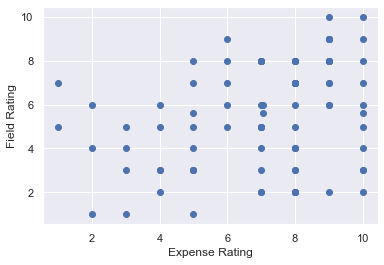

In [102]:
#Plotting the data using scatter plot
plt.scatter(rating['Expense Rating'],rating['Field Rating']) 

plt.xlabel('Expense Rating')
plt.ylabel('Field Rating')


In [44]:
# Create an empty list
wcss=[]

# Create all possible cluster solutions with a loop
for i in range(1,7):
    # Cluster solution with i clusters
    kmeans = KMeans(i)
    # Fit the data
    kmeans.fit(rating)
    # Find WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    # Append the value to the WCSS list
    wcss.append(wcss_iter)
wcss

C:\Users\vbjnn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[999.1471571906352,
 518.99881840858,
 301.8489423230059,
 237.14731587019298,
 190.06686952535617,
 158.29153603332034]

#### Using Elbow method to choose number of clusters

Text(0, 0.5, 'Within-cluster Sum of Squares')

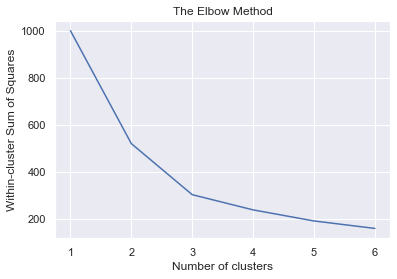

In [45]:
# Create a variable containing the numbers from 1 to 6, so we can use it as X axis of the future plot
number_clusters = range(1,7)
# Plot the number of clusters vs WCSS
plt.plot(number_clusters,wcss)
# Name the graph
plt.title('The Elbow Method')
# Name the x-axis
plt.xlabel('Number of clusters')
# Name the y-axis
plt.ylabel('Within-cluster Sum of Squares')

We want WCSS to be as low as possible while we can still have small no. of clusters so we could interpret them.<br>
In the above graph, we are getting two elbow points i.e. at 2 and 3<br>
3 is the biggest no. of cluster for which we are still getting the significant decrease in WCSS. Thereafter there is almost no improvement.<p>
So we will go with 3 cluster solution. 

In [46]:
# Create an object (which we would call kmeans)
kmeans = KMeans(3)
#  Fit the input data, i.e. cluster the data in rating in 3 clusters
kmeans.fit(rating)

KMeans(n_clusters=3)

Text(0.5, 1.0, 'Ratings of the preferred country')

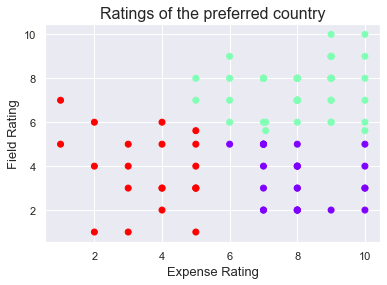

In [104]:
#Create a copy of 'rating' dataframe 
clusters = rating.copy() 
#Create a new column, containing the predicted clusters for each observation.
clusters['cluster_pred']=kmeans.fit_predict(rating)
## Plot the data using the 'Expense Rating' and 'Field Rating'
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map
plt.scatter(rating['Expense Rating'],rating['Field Rating'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Expense Rating',fontsize=13)
plt.ylabel('Field Rating',fontsize=13)
plt.title("Ratings of the preferred country", fontsize=16)


The 3 clusters can be interpreted as:<br>
**Red**(People whose preferred countries are less expensive and well in terms of on field reality): **Price and Culture Sensitive.**<br>
**Violet**(People whose preferred countries are highly expensive but well in terms of field reality): **Culture Sensitive** <br>
**Green**(People whose preferred countries are highly expensive and harsh in terms of on field reality): **Price and Culture insensitive**

### Logistic Regression

In [48]:
#statsmodels would be used for performing logistic regression.
import statsmodels.api as sm



In [49]:
#Apply a fix to the statsmodels library
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [51]:
#Create a dataframe containing "Loan","FamilyIncome"&'Country' columns
lr_df=survey[["Loan","FamilyIncome",'Country']]

In [52]:
lr_df["Loan"]=lr_df["Loan"].map({'Yes':1,'No':0}) # Replace all 'No' entries with 0, and all 'Yes' entries with 1
lr_df["FamilyIncome"]=lr_df["FamilyIncome"].map({'<6 LPA':1,'>6 LPA':0})  #Replace all "<6 LPA" entries with 0, and all ">6 LPA" entries with 1
lr_df=pd.get_dummies(lr_df,drop_first=True) #Create Dummy Variables

<ipython-input-52-2e03111cb19c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lr_df["Loan"]=lr_df["Loan"].map({'Yes':1,'No':0}) # Replace all 'No' entries with 0, and all 'Yes' entries with 1
<ipython-input-52-2e03111cb19c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lr_df["FamilyIncome"]=lr_df["FamilyIncome"].map({'<6 LPA':1,'>6 LPA':0})  #Replace all "<6 LPA" entries with 0, and all ">6 LPA" entries with 1


In [53]:
lr_df

,Loan,FamilyIncome,Country_Australia,Country_Canada,Country_Europe,Country_U.S.A.
0,0,1,0,0,1,0
1,0,1,0,0,0,0
2,1,0,0,0,0,1
3,1,1,0,0,0,1
4,1,1,0,0,0,0
...,...,...,...,...,...,...
89,1,1,1,0,0,0
90,0,1,0,0,0,1
91,1,0,1,0,0,0
92,0,0,0,0,0,1


In [54]:
y=lr_df["Loan"] #Create a variable that contains target variables
x1=lr_df[["FamilyIncome","Country_Australia","Country_Canada","Country_Europe","Country_U.S.A."]]# Create a variable that contains input variables.

In [55]:
#adding a column containing 1 for the constant in model 
x=sm.add_constant(x1)

In [56]:
#splitting the data into train set(80%) and test set(20%)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=365)

In [57]:
reg_log = sm.Logit(y_train,x_train)
results_log = reg_log.fit()
#Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.590106
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Loan   No. Observations:                   75
Model:                          Logit   Df Residuals:                       69
Method:                           MLE   Df Model:                            5
Date:                Sun, 30 May 2021   Pseudo R-squ.:                 0.07291
Time:                        15:33:39   Log-Likelihood:                -44.258
converged:                       True   LL-Null:                       -47.739
Covariance Type:            nonrobust   LLR p-value:                    0.2235
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4200      0.701      0.599      0.549      -0.953       1.793
FamilyIncome         -0.5815      0.527     -1.104      0.270      -1.614       0.451
Country_Australia     1.4891      1.028      1.449      0.147      -0.526       3.504
Country_Canada        0.9905      1.073      0.923      0.356      -1.112       3.093
Country_Europe        1.1225      0.905      1.241      0.215      -0.651       2.896
Country_U.S.A.       -0.0253      0.779     -0.032      0.974      -1.553       1.502
=====================================================================================
"""

In [58]:
#Create a function for confusion matrix that would assess the acuracy of the model.
def confusion_matrix(data,actual_values,model):
    pred_values = model.predict(data) #Predict the values using the Logit model
    bins=np.array([0,0.5,1])   # Specify the bins 
     # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
     # if they are between 0.5 and 1, they will be considered 1
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    #Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    #Return the confusion matrix and the accuracy
    return cm, accuracy

In [59]:
#Calling the function on the test data
confusion_matrix(x_test,y_test,results_log)

(array([[ 2.,  1.],
        [ 6., 10.]]),
 0.631578947368421)

This implies our model has 63.15% accuracy.